# Q-learning

1. Environment Setup:
   - We define a simple 3x4 grid world environment.
   - The goal state (reward +1) is at (0, 3).
   - There are two obstacle states (reward -1) at (1, 1) and (1, 3).
   - All other states have a reward of 0.

2. Q-learning Algorithm:
   - We use Q-learning, which is a model-free reinforcement learning algorithm.
   - It learns the action-value function Q(s, a), which represents the expected future reward for taking action 'a' in state 's'.

3. Q-table Initialization:
   - We initialize a 3D Q-table with zeros, representing the expected reward for each state-action pair.

4. Hyperparameters:
   - Learning rate (alpha): Determines how much new information overrides old information.
   - Discount factor (gamma): Balances immediate and future rewards.
   - Exploration rate (epsilon): Controls the trade-off between exploration and exploitation.

5. Action Selection:
   - We use an epsilon-greedy policy to balance exploration and exploitation.
   - With probability epsilon, we choose a random action (explore).
   - Otherwise, we choose the action with the highest Q-value (exploit).

6. Training Loop:
   - We run the training for a fixed number of episodes.
   - In each episode, the agent starts at the bottom-left corner (2, 0) and moves until it reaches a terminal state.
   - For each step, we:
     a. Choose an action using the epsilon-greedy policy.
     b. Get the next state and reward.
     c. Update the Q-value using the Q-learning update rule.

7. Q-value Update:
   - The core of Q-learning is the value update rule:
     Q(s, a) = (1 - α) * Q(s, a) + α * (R + γ * max(Q(s', a')))
   - This update balances the old Q-value with the new information (reward + discounted future Q-value).

8. Optimal Policy:
   - After training, we extract the optimal policy by choosing the action with the highest Q-value for each state.

9. Results:
   - The final output shows the optimal action to take in each state of the grid world.

This example demonstrates how an agent can learn to navigate an environment through trial and error, gradually improving its policy to maximize cumulative rewards. The Q-learning algorithm allows the agent to learn the optimal action-value function without needing a model of the environment's dynamics.

In [ ]:
import numpy as np
import random

# Define the grid world
grid_world = [
    [0, 0, 0, 1],
    [0, -1, 0, -1],
    [0, 0, 0, 0]
]

# Define possible actions
actions = ['up', 'right', 'down', 'left']

# Initialize Q-table with zeros
q_table = np.zeros((len(grid_world), len(grid_world[0]), len(actions)))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return actions[np.argmax(q_table[state])]  # Exploit

# Function to get next state given current state and action
def get_next_state(state, action):
    row, col = state
    if action == 'up' and row > 0:
        return (row - 1, col)
    elif action == 'right' and col < len(grid_world[0]) - 1:
        return (row, col + 1)
    elif action == 'down' and row < len(grid_world) - 1:
        return (row + 1, col)
    elif action == 'left' and col > 0:
        return (row, col - 1)
    return state  # If the move is invalid, stay in the same state

# Training loop
num_episodes = 1000
for episode in range(num_episodes):
    state = (2, 0)  # Start state
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = grid_world[next_state[0]][next_state[1]]

        # Q-value update
        old_q = q_table[state + (actions.index(action),)]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - alpha) * old_q + alpha * (reward + gamma * next_max_q)
        q_table[state + (actions.index(action),)] = new_q

        state = next_state
        if reward == 1 or reward == -1:
            done = True

# Function to get the optimal policy
def get_optimal_policy():
    policy = []
    for i in range(len(grid_world)):
        row = []
        for j in range(len(grid_world[0])):
            best_action = actions[np.argmax(q_table[i, j])]
            row.append(best_action)
        policy.append(row)
    return policy

# Print the optimal policy
optimal_policy = get_optimal_policy()
print("Optimal Policy:")
for row in optimal_policy:
    print(row)

Optimal Policy:
['right', 'right', 'right', 'up']
['up', 'up', 'up', 'up']
['up', 'right', 'up', 'up']


# Visualization

1. Initial Grid World Visualization:
   This visualization shows the layout of our grid world environment:
   - White cells: Normal states (reward 0)
   - Red cells: Obstacle states (reward -1)
   - Green cell: Goal state (reward +1)
   - The agent starts at the bottom-left corner (2, 0)

2. Q-table Visualizations:
   We visualize the Q-table at different stages of training (episodes 1, 100, 500, and 1000):
   - Each subplot represents the Q-values for a specific action (Up, Right, Down, Left)
   - The color intensity represents the Q-value magnitude (darker colors = higher values)
   - As training progresses, you should see the Q-values evolve, with higher values forming paths to the goal state

3. Optimal Policy Visualization:
   After training, we visualize the learned optimal policy:
   - Arrows in each cell show the best action to take from that state
   - The agent should learn a path from the start state to the goal state, avoiding obstacles

These visualizations help us understand:

1. Environment Setup: The initial grid world visualization clearly shows the layout of our environment, including the start state, goal state, and obstacles.

2. Learning Progress: By visualizing the Q-table at different stages, we can see how the agent's knowledge evolves over time. Initially, the Q-values are uniform (all zeros). As training progresses, you should see patterns emerge, with higher Q-values forming paths to the goal state.

3. Exploration vs. Exploitation: In early episodes, the Q-table visualizations might look noisy due to more exploration. As training continues, clear patterns should emerge as the agent exploits its learned knowledge more often.

4. Final Policy: The optimal policy visualization shows the end result of learning - the best action to take in each state. This should show a clear path from the start to the goal, avoiding obstacles.

5. Value Propagation: In the Q-table visualizations, you might notice how high values "spread" from the goal state to nearby states over time. This illustrates how Q-learning propagates value information through the state space.



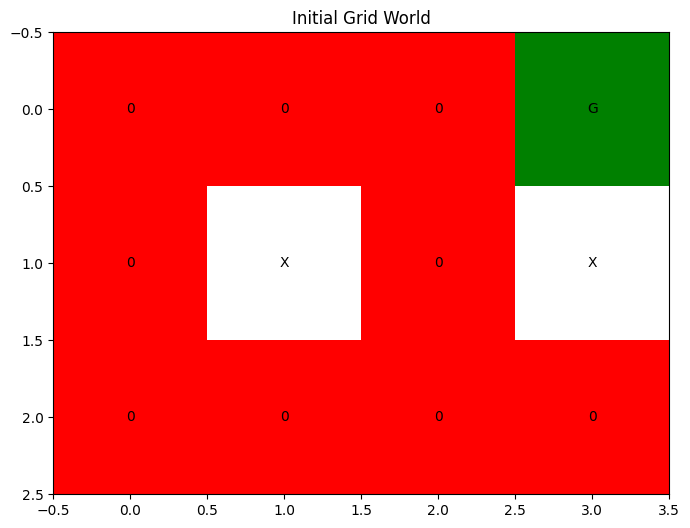

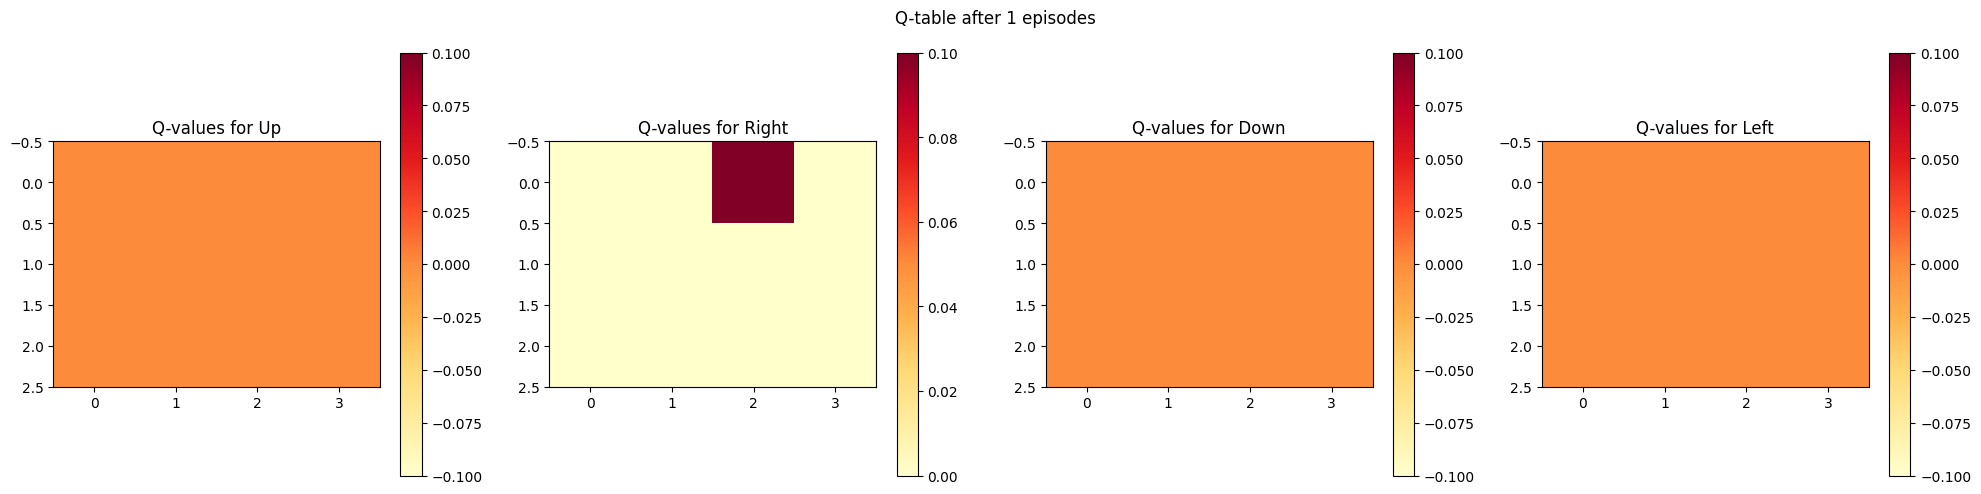

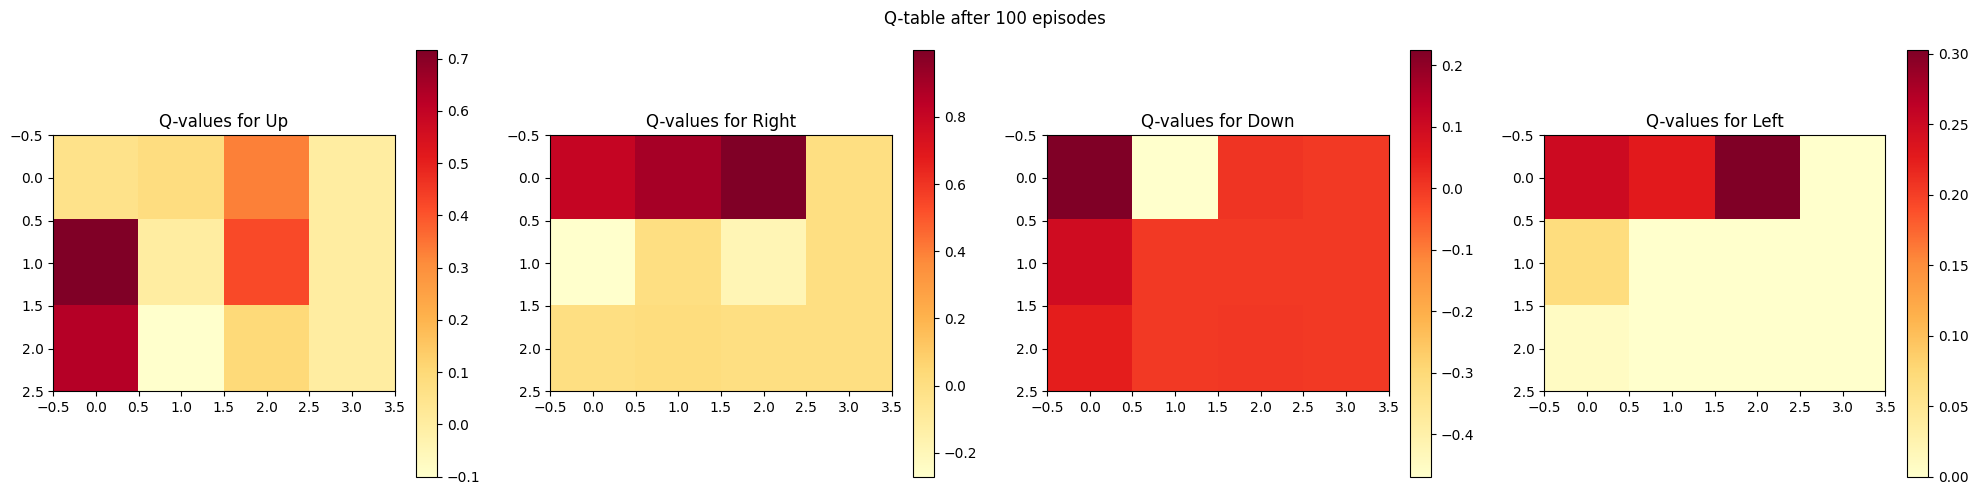

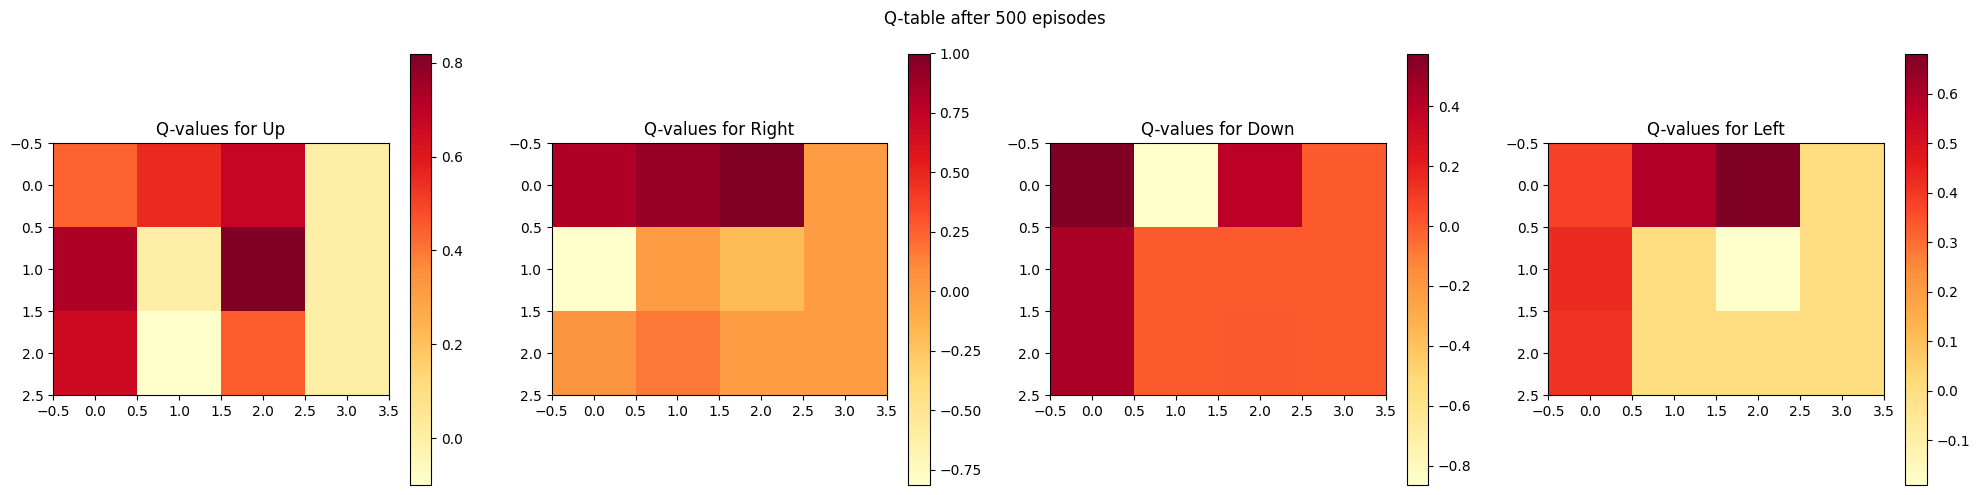

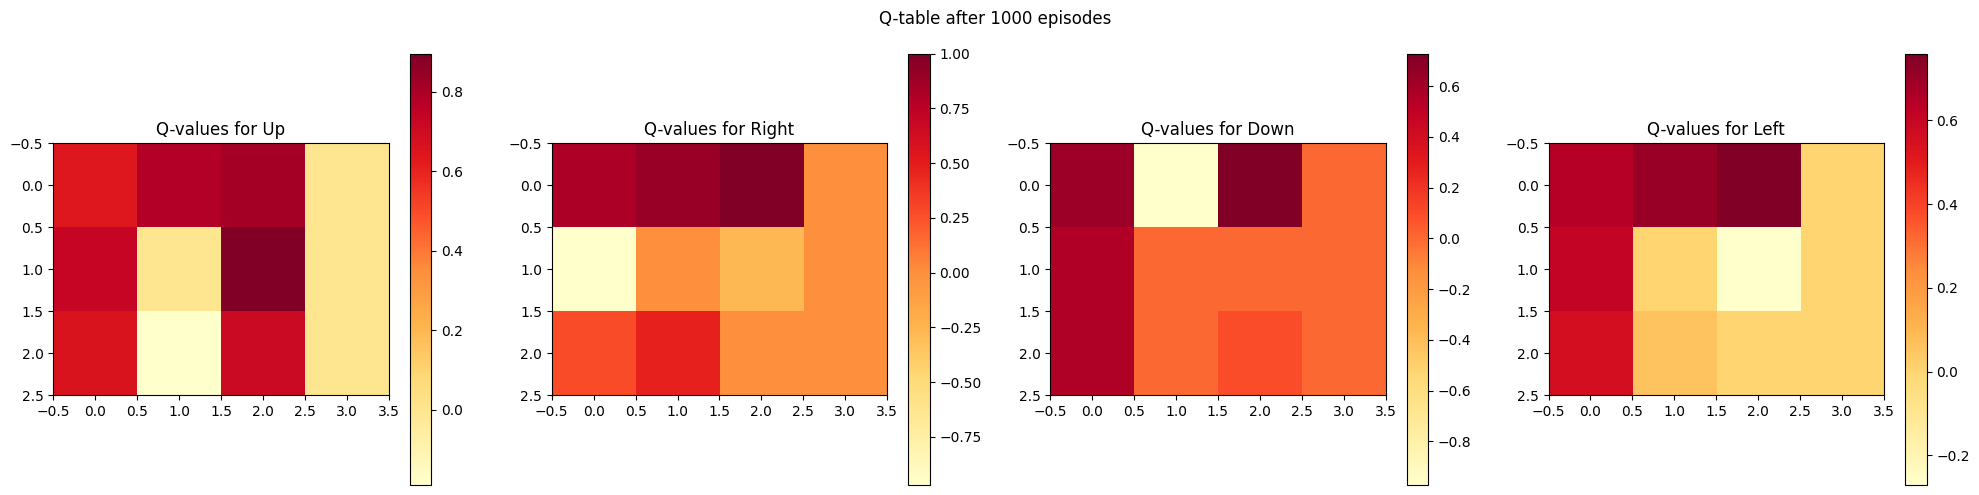

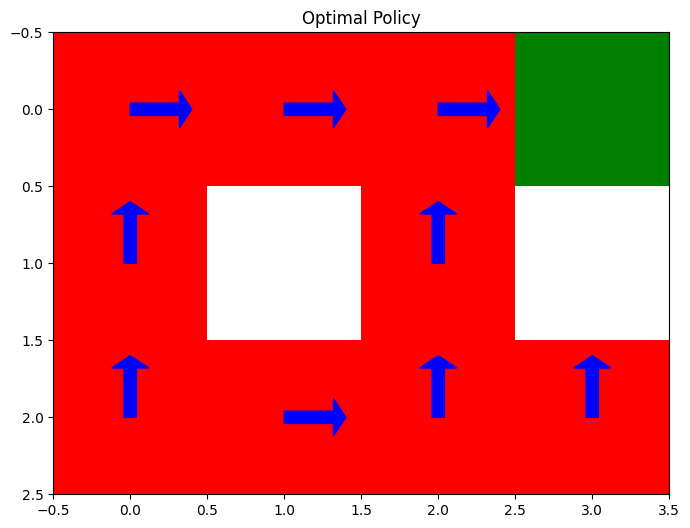

Optimal Policy:
['right', 'right', 'right', 'up']
['up', 'up', 'up', 'up']
['up', 'right', 'up', 'up']


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Arrow

# Define the grid world
grid_world = [
    [0, 0, 0, 1],
    [0, -1, 0, -1],
    [0, 0, 0, 0]
]

# Define possible actions
actions = ['up', 'right', 'down', 'left']

# Initialize Q-table with zeros
q_table = np.zeros((len(grid_world), len(grid_world[0]), len(actions)))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return actions[np.argmax(q_table[state])]  # Exploit

# Function to get next state given current state and action
def get_next_state(state, action):
    row, col = state
    if action == 'up' and row > 0:
        return (row - 1, col)
    elif action == 'right' and col < len(grid_world[0]) - 1:
        return (row, col + 1)
    elif action == 'down' and row < len(grid_world) - 1:
        return (row + 1, col)
    elif action == 'left' and col > 0:
        return (row, col - 1)
    return state  # If the move is invalid, stay in the same state

# Function to visualize the grid world
def visualize_grid_world(grid, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    cmap = ListedColormap(['white', 'red', 'green'])
    ax.imshow(grid, cmap=cmap)

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == -1:
                ax.text(j, i, 'X', ha='center', va='center')
            elif grid[i][j] == 1:
                ax.text(j, i, 'G', ha='center', va='center')
            else:
                ax.text(j, i, f'{grid[i][j]}', ha='center', va='center')

    ax.set_title(title)
    plt.show()

# Function to visualize the Q-table
def visualize_q_table(q_table, episode):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    titles = ['Up', 'Right', 'Down', 'Left']

    for i in range(4):
        im = axs[i].imshow(q_table[:,:,i], cmap='YlOrRd')
        axs[i].set_title(f'Q-values for {titles[i]}')
        fig.colorbar(im, ax=axs[i])

    plt.suptitle(f'Q-table after {episode} episodes')
    plt.tight_layout()
    plt.show()

# Function to visualize the optimal policy
def visualize_optimal_policy(policy):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(grid_world, cmap=ListedColormap(['white', 'red', 'green']))

    for i in range(len(policy)):
        for j in range(len(policy[0])):
            if grid_world[i][j] == 0:
                if policy[i][j] == 'up':
                    ax.add_patch(Arrow(j, i, 0, -0.4, width=0.4, color='blue'))
                elif policy[i][j] == 'right':
                    ax.add_patch(Arrow(j, i, 0.4, 0, width=0.4, color='blue'))
                elif policy[i][j] == 'down':
                    ax.add_patch(Arrow(j, i, 0, 0.4, width=0.4, color='blue'))
                elif policy[i][j] == 'left':
                    ax.add_patch(Arrow(j, i, -0.4, 0, width=0.4, color='blue'))

    ax.set_title('Optimal Policy')
    plt.show()

# Visualize the initial grid world
visualize_grid_world(grid_world, 'Initial Grid World')

# Training loop
num_episodes = 1000
for episode in range(num_episodes):
    state = (2, 0)  # Start state
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = grid_world[next_state[0]][next_state[1]]

        # Q-value update
        old_q = q_table[state + (actions.index(action),)]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - alpha) * old_q + alpha * (reward + gamma * next_max_q)
        q_table[state + (actions.index(action),)] = new_q

        state = next_state
        if reward == 1 or reward == -1:
            done = True

    # Visualize Q-table at specific episodes
    if episode in [0, 99, 499, 999]:
        visualize_q_table(q_table, episode + 1)

# Function to get the optimal policy
def get_optimal_policy():
    policy = []
    for i in range(len(grid_world)):
        row = []
        for j in range(len(grid_world[0])):
            best_action = actions[np.argmax(q_table[i, j])]
            row.append(best_action)
        policy.append(row)
    return policy

# Get and visualize the optimal policy
optimal_policy = get_optimal_policy()
visualize_optimal_policy(optimal_policy)

# Print the optimal policy
print("Optimal Policy:")
for row in optimal_policy:
    print(row)

# Dyna-Q

1. Dyna-Q Algorithm:
   Dyna-Q extends Q-learning by maintaining a model of the environment and using it for planning. The key steps are:
   a) Perform a real action in the environment and update Q-values (like in Q-learning)
   b) Update the model with the observed transition and reward
   c) Perform a number of planning steps using the model

2. Model:
   The model is a dictionary that stores observed transitions and rewards. For each state-action pair, it keeps track of the next state and reward observed.

3. Planning Steps:
   After each real step, the agent performs a number of planning steps (defined by `planning_steps`). In each planning step:
   a) A random state and action are selected from the model
   b) The model is used to simulate the next state and reward
   c) The Q-values are updated using this simulated experience

Now, let's go through the visualizations:

1. Initial Grid World:
   This shows the layout of our environment, just like in the Q-learning example.

2. Q-table Visualizations:
   These are similar to the Q-learning example, but you might notice faster convergence due to the additional planning steps.

3. Model Visualizations:
   This is new for Dyna-Q. It shows the transitions that the agent has observed and stored in its model:
   - Each arrow represents a transition from one state to another
   - As the agent explores more of the environment, you'll see more arrows appear
   - This visualization helps us understand what parts of the environment the agent has explored and modeled

4. Optimal Policy Visualization:
   This is the same as in the Q-learning example, showing the final learned policy.

Key Observations:

1. Faster Learning: Dyna-Q often learns faster than standard Q-learning because it makes use of each real experience multiple times through planning.

2. Model Building: The model visualizations show how the agent builds its understanding of the environment over time. In early episodes, the model is sparse, but it becomes more complete as training progresses.

3. Exploration vs Exploitation: The model visualizations also indirectly show the exploration-exploitation trade-off. Areas of the environment that are explored more will have more transitions in the model.

4. Planning Efficiency: As the model becomes more accurate, the planning steps become more effective, leading to faster updates of the Q-values.

5. Convergence: Despite the added complexity, Dyna-Q should converge to a similar optimal policy as Q-learning, but typically in fewer real environment interactions.

This Dyna-Q implementation demonstrates how an agent can learn not just from direct experience, but also from simulated experience based on its model of the environment. The visualizations help us understand both the learning process and the model-building process that are key to Dyna-Q's performance.

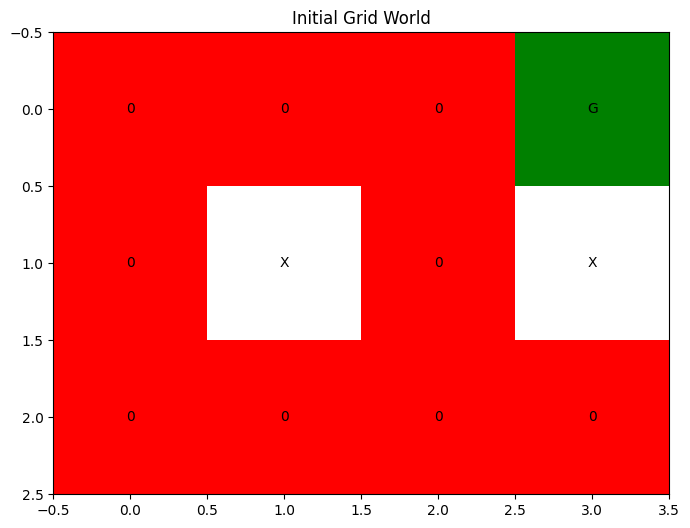

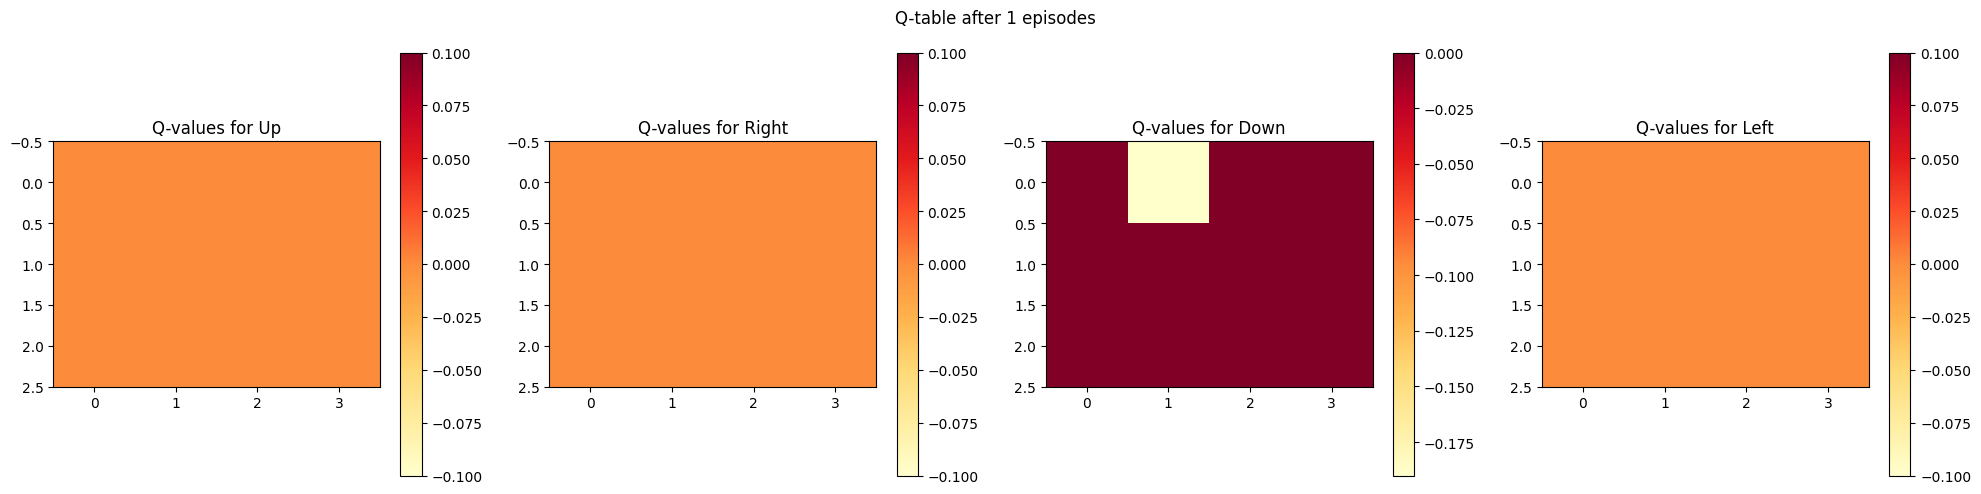

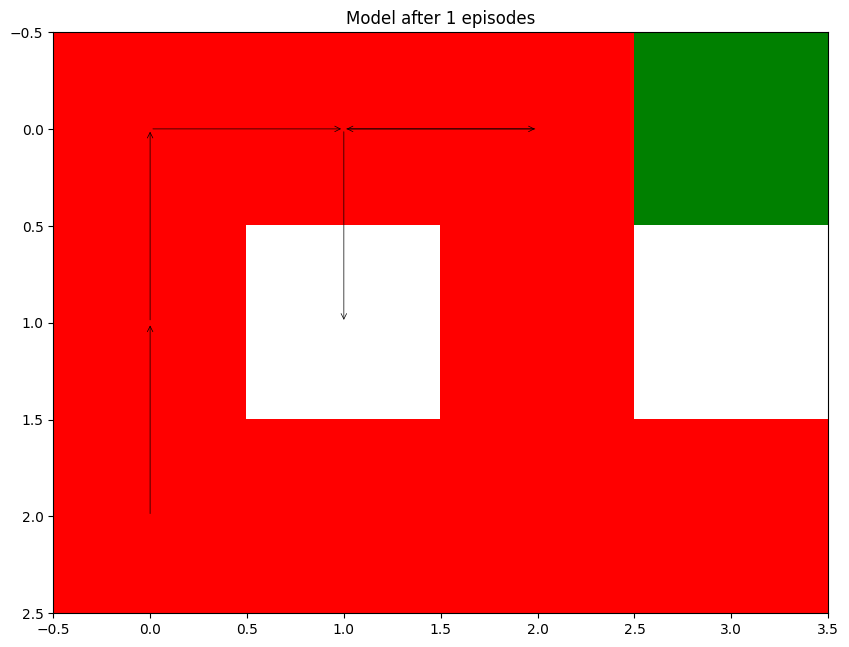

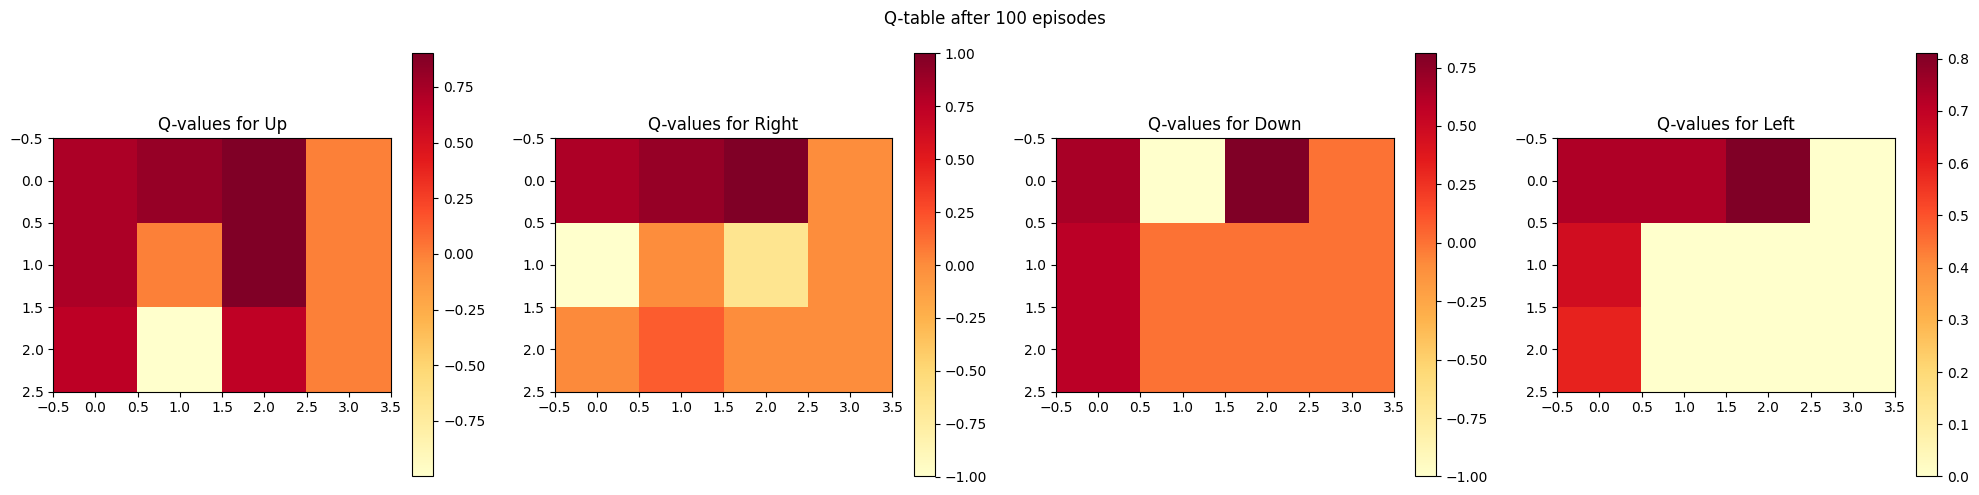

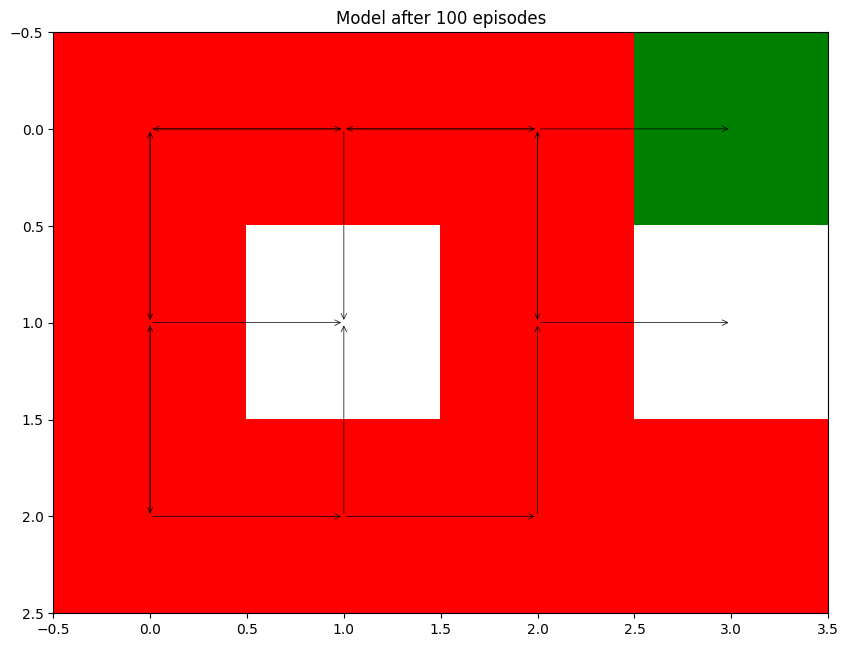

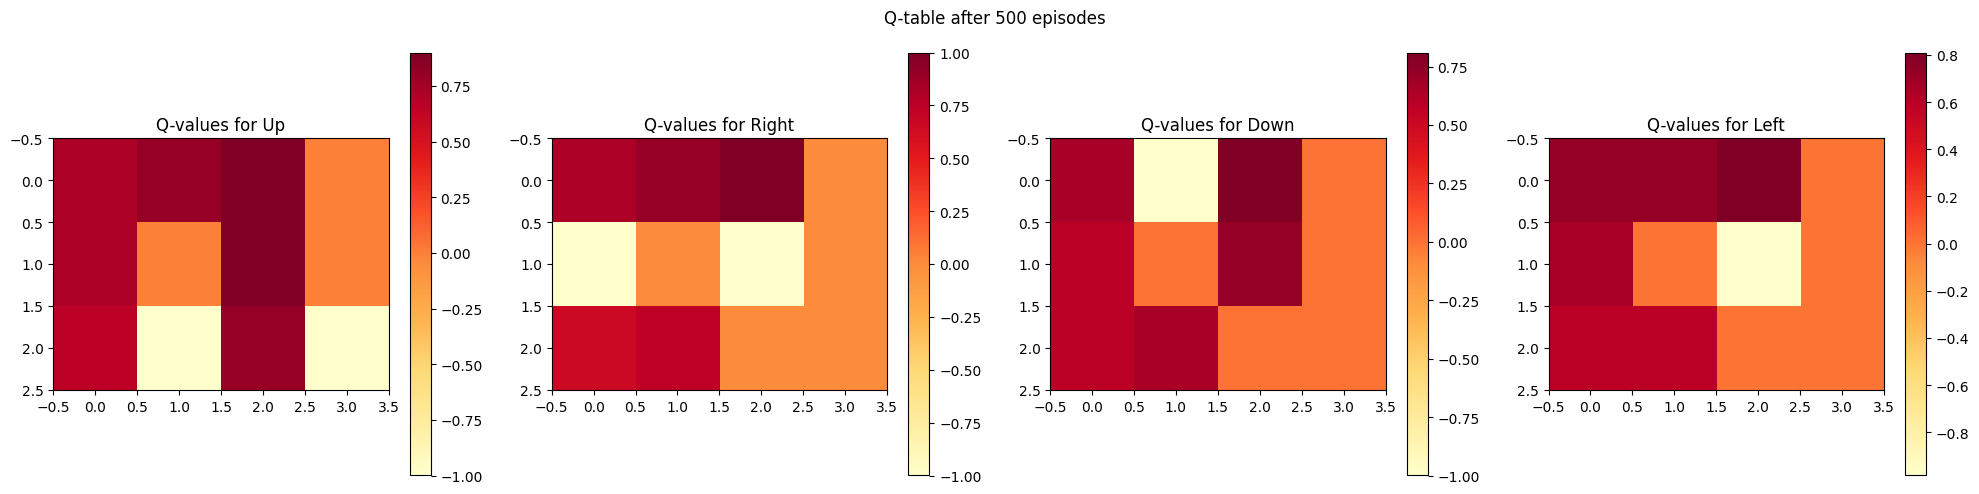

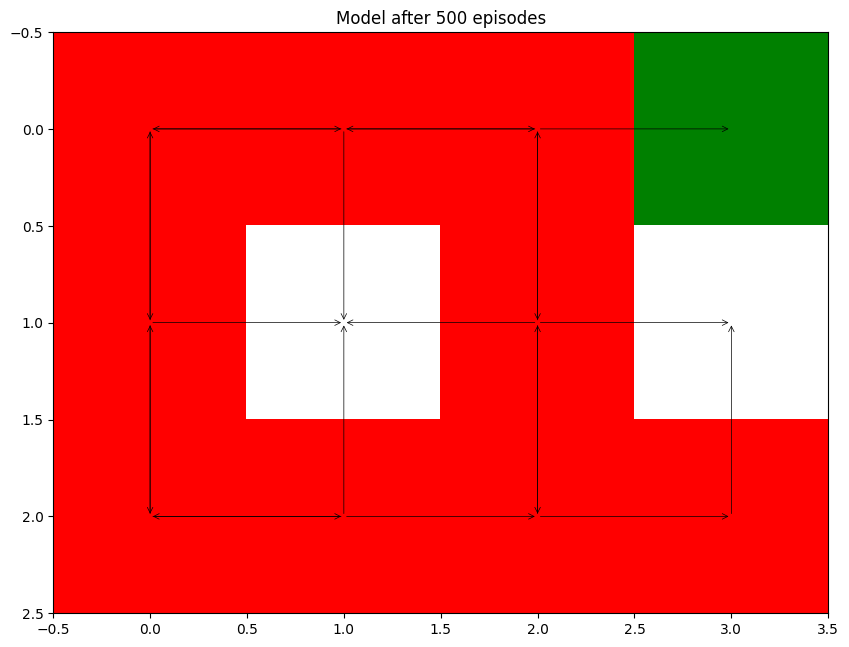

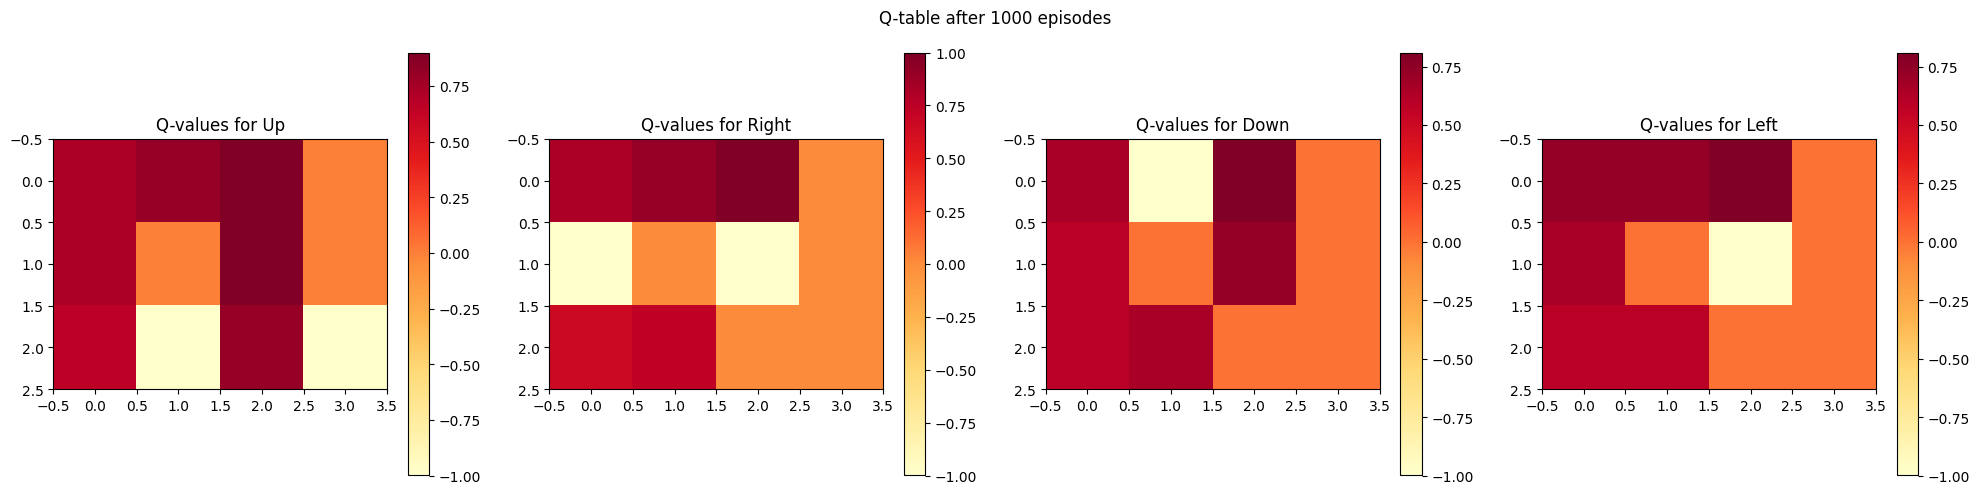

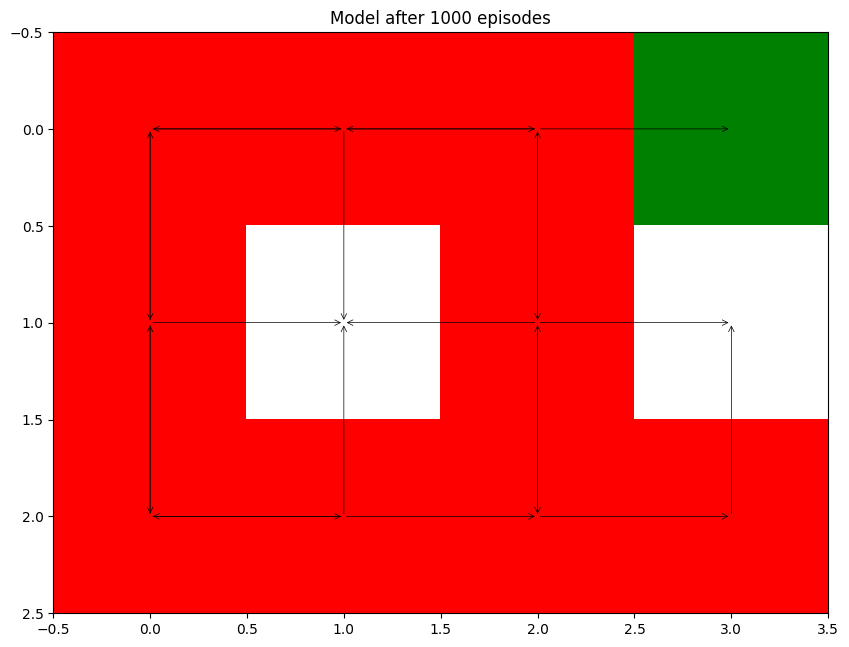

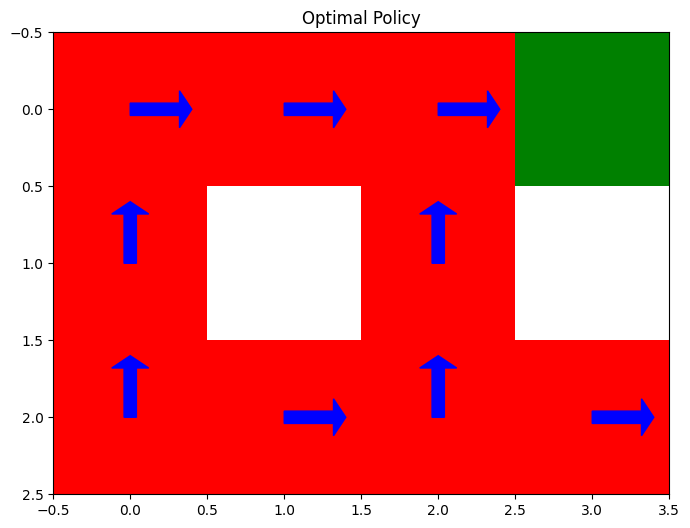

Optimal Policy:
['right', 'right', 'right', 'up']
['up', 'up', 'up', 'up']
['up', 'right', 'up', 'right']


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Arrow

# Define the grid world
grid_world = [
    [0, 0, 0, 1],
    [0, -1, 0, -1],
    [0, 0, 0, 0],
    [0,-1,-1,0]
]

# Define possible actions
actions = ['up', 'right', 'down', 'left']

# Initialize Q-table and model
q_table = np.zeros((len(grid_world), len(grid_world[0]), len(actions)))
model = {}

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
planning_steps = 10  # Number of planning steps per real step

# Function to choose an action using epsilon-greedy policy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return actions[np.argmax(q_table[state])]  # Exploit

# Function to get next state given current state and action
def get_next_state(state, action):
    row, col = state
    if action == 'up' and row > 0:
        return (row - 1, col)
    elif action == 'right' and col < len(grid_world[0]) - 1:
        return (row, col + 1)
    elif action == 'down' and row < len(grid_world) - 1:
        return (row + 1, col)
    elif action == 'left' and col > 0:
        return (row, col - 1)
    return state  # If the move is invalid, stay in the same state

# Function to visualize the grid world
def visualize_grid_world(grid, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    cmap = ListedColormap(['white', 'red', 'green'])
    ax.imshow(grid, cmap=cmap)

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == -1:
                ax.text(j, i, 'X', ha='center', va='center')
            elif grid[i][j] == 1:
                ax.text(j, i, 'G', ha='center', va='center')
            else:
                ax.text(j, i, f'{grid[i][j]}', ha='center', va='center')

    ax.set_title(title)
    plt.show()

# Function to visualize the Q-table
def visualize_q_table(q_table, episode):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    titles = ['Up', 'Right', 'Down', 'Left']

    for i in range(4):
        im = axs[i].imshow(q_table[:,:,i], cmap='YlOrRd')
        axs[i].set_title(f'Q-values for {titles[i]}')
        fig.colorbar(im, ax=axs[i])

    plt.suptitle(f'Q-table after {episode} episodes')
    plt.tight_layout()
    plt.show()

# Function to visualize the optimal policy
def visualize_optimal_policy(policy):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(grid_world, cmap=ListedColormap(['white', 'red', 'green']))

    for i in range(len(policy)):
        for j in range(len(policy[0])):
            if grid_world[i][j] == 0:
                if policy[i][j] == 'up':
                    ax.add_patch(Arrow(j, i, 0, -0.4, width=0.4, color='blue'))
                elif policy[i][j] == 'right':
                    ax.add_patch(Arrow(j, i, 0.4, 0, width=0.4, color='blue'))
                elif policy[i][j] == 'down':
                    ax.add_patch(Arrow(j, i, 0, 0.4, width=0.4, color='blue'))
                elif policy[i][j] == 'left':
                    ax.add_patch(Arrow(j, i, -0.4, 0, width=0.4, color='blue'))

    ax.set_title('Optimal Policy')
    plt.show()

# Function to visualize the model
def visualize_model(model, episode):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(grid_world, cmap=ListedColormap(['white', 'red', 'green']))

    for state in model:
        for action in model[state]:
            next_state, _ = model[state][action]
            ax.annotate("", xy=next_state[::-1], xytext=state[::-1],
                        arrowprops=dict(arrowstyle="->", lw=0.5))

    ax.set_title(f'Model after {episode} episodes')
    plt.show()

# Visualize the initial grid world
visualize_grid_world(grid_world, 'Initial Grid World')

# Training loop
num_episodes = 1000
for episode in range(num_episodes):
    state = (2, 0)  # Start state
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = grid_world[next_state[0]][next_state[1]]

        # Q-learning update
        old_q = q_table[state + (actions.index(action),)]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - alpha) * old_q + alpha * (reward + gamma * next_max_q)
        q_table[state + (actions.index(action),)] = new_q

        # Model update
        if state not in model:
            model[state] = {}
        model[state][action] = (next_state, reward)

        # Planning step
        for _ in range(planning_steps):
            plan_state = random.choice(list(model.keys()))
            plan_action = random.choice(list(model[plan_state].keys()))
            plan_next_state, plan_reward = model[plan_state][plan_action]

            # Q-learning update on simulated experience
            plan_old_q = q_table[plan_state + (actions.index(plan_action),)]
            plan_next_max_q = np.max(q_table[plan_next_state])
            plan_new_q = (1 - alpha) * plan_old_q + alpha * (plan_reward + gamma * plan_next_max_q)
            q_table[plan_state + (actions.index(plan_action),)] = plan_new_q

        state = next_state
        if reward == 1 or reward == -1:
            done = True

    # Visualize Q-table and model at specific episodes
    if episode in [0, 99, 499, 999]:
        visualize_q_table(q_table, episode + 1)
        visualize_model(model, episode + 1)

# Function to get the optimal policy
def get_optimal_policy():
    policy = []
    for i in range(len(grid_world)):
        row = []
        for j in range(len(grid_world[0])):
            best_action = actions[np.argmax(q_table[i, j])]
            row.append(best_action)
        policy.append(row)
    return policy

# Get and visualize the optimal policy
optimal_policy = get_optimal_policy()
visualize_optimal_policy(optimal_policy)

# Print the optimal policy
print("Optimal Policy:")
for row in optimal_policy:
    print(row)